# 4. PREPROCESAMIENTO

Instalo la librería Pandas, Numpy, Matplotlib y Seaborn.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Utilizo la librería Pandas para abrir el archivo. 

In [3]:
diabetes = pd.read_csv(r"https://raw.githubusercontent.com/KevinFDI/IML-Practica-1/main/datasets/diabetes.csv")

Con este comando se pueden ver los primeros datos en el dataframe.

In [4]:
round(diabetes.head(10), 2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Clase
0,2,138,62,35,0,33.6,0.13,47,1
1,0,84,82,31,125,38.2,0.23,23,0
2,0,145,0,0,0,44.2,0.63,31,1
3,0,135,68,42,250,42.3,0.36,24,1
4,1,139,62,41,480,40.7,0.54,21,0
5,0,173,78,32,265,46.5,1.16,58,0
6,4,99,72,17,0,25.6,0.29,28,0
7,8,194,80,0,0,26.1,0.55,67,0
8,2,83,65,28,66,36.8,0.63,24,0
9,2,89,90,30,0,33.5,0.29,42,0


In [18]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Clase                       0
dtype: int64

Veo la dimensión del dataset

In [5]:
diabetes.shape

(2000, 9)

Cantidad de pacientes diabéticos y no diabéticos.

In [6]:
diabetes.Clase.value_counts()

0    1316
1     684
Name: Clase, dtype: int64

Utilizo la libreía Seaborn para graficar las clases.

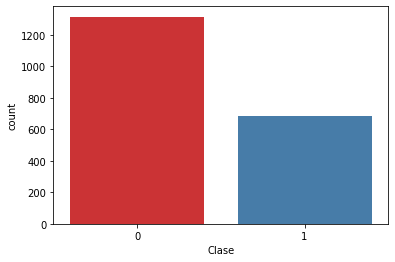

In [9]:
sns.countplot(x="Clase", data = diabetes, palette="Set1");

Chequeo el tipo de datos del dataset y veo que todos son numéricos.

In [10]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Clase                         int64
dtype: object

Con este comando se puede ver un análisis estadístico rápido de las variables.

In [11]:
round(diabetes.describe(), 2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Clase
count,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00,2000.00
mean,3.70,121.18,69.15,20.94,80.25,32.19,0.47,33.09,0.34
std,3.31,32.07,19.19,16.10,111.18,8.15,0.32,11.79,0.47
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,63.50,0.00,0.00,27.38,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,40.00,32.30,0.38,29.00,0.00
75%,6.00,141.00,80.00,32.00,130.00,36.80,0.62,40.00,1.00
max,17.00,199.00,122.00,110.00,744.00,80.60,2.42,81.00,1.00



Puedo observar que hay valores nulos en las columnas:
*   Pregnancies
*   Glucose
*   BloodPressure
*   SkinThickness
*   Insulin
*   BMI






Elimino la columna de Pregnancies y la de Clase asi no obtengo la mediana de las mismas.

In [14]:
diabetes_1 = diabetes.drop(["Pregnancies", "Clase"], axis = 1)
diabetes_1

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,138,62,35,0,33.6,0.127,47
1,84,82,31,125,38.2,0.233,23
2,145,0,0,0,44.2,0.630,31
3,135,68,42,250,42.3,0.365,24
4,139,62,41,480,40.7,0.536,21
...,...,...,...,...,...,...,...
1995,75,64,24,55,29.7,0.370,33
1996,179,72,42,130,32.7,0.719,36
1997,85,78,0,0,31.2,0.382,42
1998,129,110,46,130,67.1,0.319,26


Obtengo la mediana del resto de las columnas.

In [15]:
medians = round(diabetes_1.median(), 2)
print("Median",medians)

Median Glucose                     117.00
BloodPressure                72.00
SkinThickness                23.00
Insulin                      40.00
BMI                          32.30
DiabetesPedigreeFunction      0.38
Age                          29.00
dtype: float64


Reemplazo los valores nulos con la mediana de cada columna y recupero las columnas aliminadas.

In [16]:
diabetes_sin_nulos = diabetes_1.replace(0, medians)

diabetes_sin_nulos["Pregnancies"] = diabetes["Pregnancies"]
diabetes_sin_nulos["Clase"] = diabetes["Clase"]

diabetes_sin_nulos

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Clase
0,138,62,35,40,33.6,0.127,47,2,1
1,84,82,31,125,38.2,0.233,23,0,0
2,145,72,23,40,44.2,0.630,31,0,1
3,135,68,42,250,42.3,0.365,24,0,1
4,139,62,41,480,40.7,0.536,21,1,0
...,...,...,...,...,...,...,...,...,...
1995,75,64,24,55,29.7,0.370,33,2,0
1996,179,72,42,130,32.7,0.719,36,8,1
1997,85,78,23,40,31.2,0.382,42,6,0
1998,129,110,46,130,67.1,0.319,26,0,1


**Matriz de correlación.**

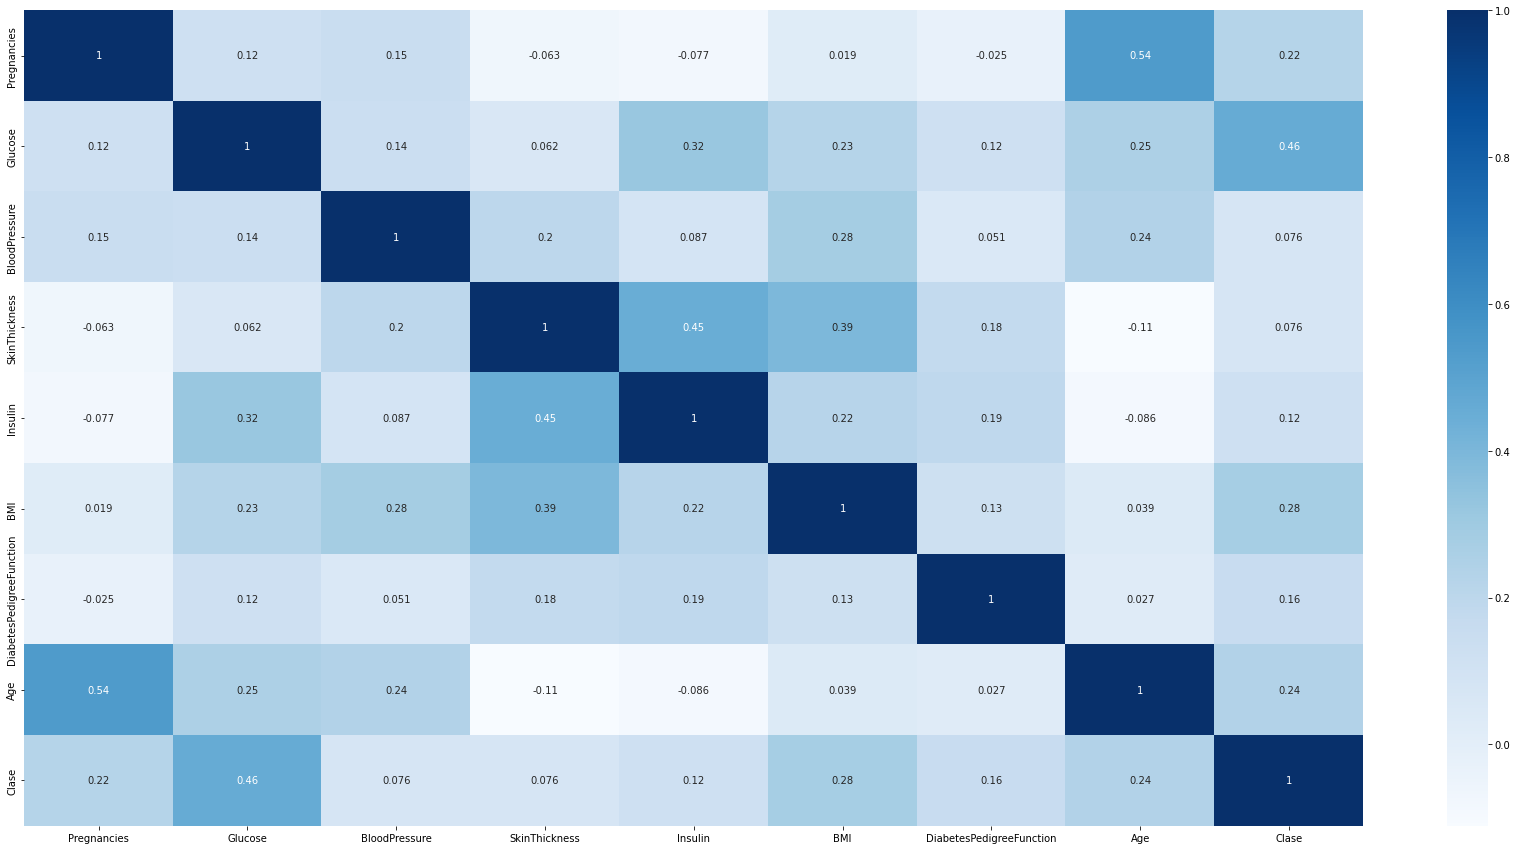

In [17]:
plt.figure(figsize=(30,15))
sns.heatmap(diabetes.corr(),annot=True,cmap='Blues')
plt.show()

No se observa una fuerte correlación negativa.

Entre las correlaciones positivas se puede destacar la correlación entre:
*   Edad y Embarazos.
*   Índice de Masa Corporal (IBM) y el Grosor de la piel.
*   Clase con la Glucosa.

**Normalizo los datos con Z**

In [19]:
# Defino un diccionario para guardar la data normalizada.
diabetes_dict = dict()

# Con un ciclo iterativo recorro el dataset iris fila por fila.
for data in diabetes_sin_nulos.columns:
    if data == "Clase":
        diabetes_dict[data] = diabetes_sin_nulos[data]
        continue
    
    # Con la librería de Numpy puedo utilizar las fórmulas de mean y std.
    mean_diabetes = np.mean(diabetes_sin_nulos[data])
    std_diabetes = np.std(diabetes_sin_nulos[data])
    
    # Utilizo la fórmula vista en clase: x= (x-mean(x)) / stdev(x)
    diabetes_dict[data] = round(((diabetes_sin_nulos[data] - mean_diabetes) / std_diabetes), 2)

# Utilizo de la librería de Pandas DataFrame para imprimir los datos como una tabla de dos dimensiones.
diabetes_normalizado = pd.DataFrame(diabetes_dict)
print(diabetes_normalizado)

      Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        0.53          -0.87           0.78    -0.60  0.13   
1       -1.24           0.80           0.36     0.26  0.77   
2        0.76          -0.03          -0.47    -0.60  1.61   
3        0.43          -0.37           1.51     1.53  1.34   
4        0.56          -0.87           1.41     3.87  1.12   
...       ...            ...            ...      ...   ...   
1995    -1.54          -0.70          -0.37    -0.45 -0.41   
1996     1.87          -0.03           1.51     0.31  0.01   
1997    -1.21           0.47          -0.47    -0.60 -0.20   
1998     0.23           3.15           1.93     0.31  4.79   
1999    -1.34          -0.03          -1.31    -0.24 -0.35   

      DiabetesPedigreeFunction   Age  Pregnancies  Clase  
0                        -1.06  1.18        -0.52      1  
1                        -0.74 -0.86        -1.12      0  
2                         0.49 -0.18        -1.12      1  
3                  

**Histograma con datos normalizados**

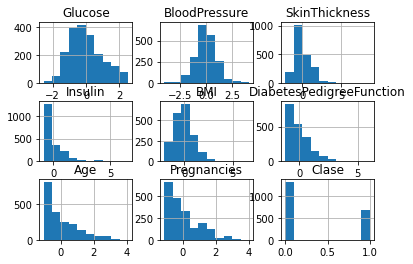

In [20]:
diabetes_normalizado.hist();

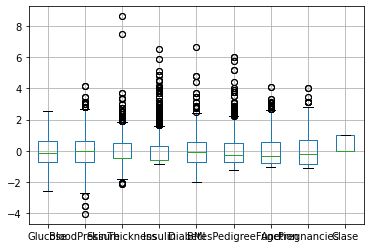

In [21]:
diabetes_normalizado.boxplot();